# Redes neuronales artificiales

In [4]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Introducción

En el ámbito de *machine learning* (aprendizaje de máquina), las **Redes Neuronales Artificiales** (RNA) tienen mucha aplicabilidad, tanto en las ciencias físicas como en otras áreas. Algunos ejemplos del uso de RNA son:

* Reconocimiento automático de imagenes
* Procesamiento de lenguajes naturales (lenguajes humanos)
* Vehículos autónomos
* Análisis de datos (*data mining*)
* Clasificación de datos

Es importante señalar que las RNA no son los únicos algorítmos de *machine learning*, y para muchas circunstancias el uso de una RNA ni siquiera es la mejor forma de resolver el problema. 

En este proyecto veremos como funcionan con un ejemplo simple.

# El proyecto: red neuronal de 2 capas

La figura a continuación muestra un diagrama de la RNA que vamos a construir, la cual tiene **2 capas de neuronas** (normalmente no incluimos la capa de neuronas de entrada cuando contamos el número de capas). 

- Las capas entre la capa de entrada y la capa de salida se llaman *capas ocultas* de la red. En el caso de la red en la figura hay solamente una capa oculta. 
- En cada capa tenemos neuronas artificiales, y entre las capas hay conexiones ponderadas. Esto significa que asociada a cada conexión hay un número que se llama el *peso* de la conexión.

|![](rna.png)|
|------------|
| Esquema de la red neuronal artificial |

La figura a continuación muestra una neurona artificial, con 3 entradas y una salida (similar a la que estudiamos como ejemplo en una clase). Asociada a cada neurona hay una *función de activación*.

|![](neuron.png)|
|---------------|
|Una neurona artificial|

En resumen, tenemos los siguientes componentes en una RNA:

* Una capa de entrada $\vec{x}$.
* Varias capas ocultas.
* Una capa de salida $\vec{y}$.
* Un conjunto de pesos entre cada capa $W$.
* Una función de activación, $\sigma$, asociada a cada neurona en las capas ocultas y de salida.

Hemos definido variables matemáticas arriba para expresar la operación de la red matemáticamente. Notar que en la capa de entrada, las neuronas no tienen función de activación: estas simplemente dan los valores de entrada a la red. Representamos estos valores en un vector $\vec{x}$. Si hay $N$ neuronas en la capa de entrada, el vector $\vec{x}$ tiene $N$ componentes.

### Tarea 1 

Considerar una red con $4$ neuronas en la capa de entrada. ¿Cuántos elementos tendrá el vector $\vec{x}$? Considerar un conjunto de entradas donde la primera neurona tiene el valor $1$, la segunda $0.5$, la tercera $0.8$ y la cuarta $1.2$. Escribir el vector $\vec{x}$ en este caso.

#### Solución

Si hay $4$ neuronas en la capa de entrada, significa que hay $4$ entradas a la red, y por lo tanto $4$ elementos en el vector $\vec{x}$.

Para los valores dados en la pregunta el vector será:

$\vec{x} = \begin{pmatrix} 1 \\ 0.5 \\ 0.8 \\ 1.2 \end{pmatrix}$

### Tarea 2

Considerar los siguientes vectores:

$\vec{x} = \begin{pmatrix} 1 \\ 1 \\ 0 \\ 0 \end{pmatrix}, \quad \quad \vec{y} = \begin{pmatrix} 0 \\ 1 \\ 2 \\ 0 \end{pmatrix}$. 

Calcular $|\vec{x}|$, $|\vec{y}|$, $\vec{x} \cdot \vec{y}$. ¿Qué representan estos valores, geométricamente?

#### Solución

Con las componentes de los vectores se puede calcular:

$|\vec{x}| = \sqrt{x_1^2 + x_2^2 + x_3^2 + x_4^2} = \sqrt{1^2 + 1^2 + 0^2 + 0^2} = \sqrt{2}$

$|\vec{y}| = \sqrt{y_1^2 + y_2^2 + y_3^2 + y_4^2} = \sqrt{0^2 + 1^2 + 2^2 + 0^2} = \sqrt{5}$

Esto valores representan matemáticamente la longitud (*norma* o *modulo*) de los vectores.

Con las componentes también se puede calcular el *producto punto* (o *producto escalar*):

$\vec{x} \cdot \vec{y} = x_1y_1 + x_2y_2 + x_3y_3 + x_4y_4 = 1 \cdot 0 + 1 \cdot 1 + 0 \cdot 2 + 0 \cdot 0 = 1$

Esto da la proyección del vector $\vec{x}$ en el vector $\vec{y}$:

 - En el caso de tener dos vectores ortogonales, $\vec{x} \cdot \vec{y} = 0$. 
 - Si son paralelos $\vec{x} \cdot \vec{y} = |x||y|$.

Puede ser que la expresión equivalente $\vec{x} \cdot \vec{y} = |x||y| \cos \theta$ (donde $\theta$ es el ángulo entre los vectores) es más familiar.

# Función de activación

Cada neurona en la capa oculta de la red tiene $3$ entradas que vienen de las neuronas de la capa de entrada. Cada neurona en la capa oculta tiene que hacer 3 cosas:

* Calcular la suma ponderada de las entradas.
* Usar esta suma ponderada como entrada a la función de activación.
* Mandar la salida de la función de activación a la neurona en la capa de salida.

La función de activación que usaremos (y que también usamos en clases) se denomina función *sigmoide*:

$$\sigma(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{e^x + 1}$$

### Tarea 3

Definir una función en Python que calcule $\sigma(x)$ (usando la función `exp` de NumPy). Graficar los valores de la función para $-3 \leq x \leq 3$.

La función `arange` de NumPy podría ser útil. Funciona así:

In [5]:
arange(0,10,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

#### Solución

In [6]:
def sigmoide(x):
    return( 1.0/(exp(-x) + 1.0) )

In [7]:
x = arange(-3,3,0.1)

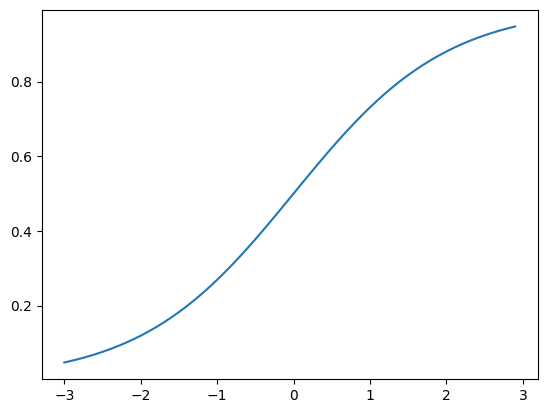

In [8]:
plot(x,sigmoide(x))

# La operación de la red

Cada conexión entre las neuronas tiene un *peso* asociado. Podemos representar estos pesos en un vector, con el mismo número de elementos que conexiones.

### Tarea 4

Respecto a la primera figura de este Notebook:

1. ¿Cuántas conexiones hay entre cada neurona en la capa oculta y la capa de entrada en la red?

2. ¿Cuántas conexiones hay entre la neurona en la capa de salida y las neuronas en la capa oculta?

3. Si representamos con un vector $\vec{W}^{(1)}$ los pesos asociados a las conexiones entre neurona $1$ de la capa oculta y las neuronas de la capa de entrada, ¿cuántos elementos debe tener?

#### Solución

1. Hay $3$ conexiones entre cada neurona de la capa oculta y la capa de entrada, es decir, cada neurona de la capa oculta tiene una conexión con cada una de las neuronas de entrada.
2. Hay $4$ conexiones, es decir, la neurona de salida tiene una conexión con cada una de las neuronas de la capa oculta.
3. Ya que hay $3$ conexiones ($3$ entradas para la neurona $1$ de la capa oculta), el vector $\vec{W}^{(1)}$ debe tener $3$ elementos.

## La suma ponderada de entradas

Podemos calcular la suma ponderada de las entradas a la neurona $1$ en la capa oculta por el uso de la matemática de vectores:

$S^{(1)} = \sum_i W^{(1)}_i x_i = \vec{W}^{(1)} \cdot \vec{x}$

### Tarea 5

Si $\vec{x} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$ y $W^{(1)} = \begin{pmatrix} 0.2 \\ 0.3 \\ -0.1 \end{pmatrix}$, calcular $S^{(1)}$.

#### Solución

$S^{(1)} = \vec{W}^{(1)} \cdot \vec{x} = 0.2 \cdot 1 + 0.3 \cdot 0 + (-0.1) \cdot 0 = 0.2$

## Representando todas las sumas ponderadas con una matriz

Para la segunda neurona en la capa oculta podemos hacer lo mismo:

$S^{(2)} = \sum_i W^{(2)}_i x_i = \vec{W}^{(2)} \cdot \vec{x}$

y así para nueronas $3$ y $4$. Pero, en vez de tener $4$ ecuaciones separadas, podemos expresar todas las ecuaciones en una sóla con el uso de una matriz.

### Tarea 6 

Las sumas ponderadas para cada neurona son $S^{(1)}$, $S^{(2)}$, $S^{(3)}$ y $S^{(4)}$. Podemos considerar un vector $\vec{S}$ con elementos $\vec{S} = (S^{(1)}, S^{(2)}, S^{(3)}, S^{(4)})$. Define una matriz $W$ de pesos en términos de los vectores $\vec{W}^{(i)}$ tal que se pueda escribir

$\vec{S} = W \cdot \vec{x}$

donde ahora tenemos $W$ (una matriz) multiplicando el vector de entrada $\vec{x}$. Si hay $N$ neuronas en la capa oculta, y $M$ neuronas en la capa de entrada, y cada neurona de entrada está conectada a cada neurona oculta, ¿cuáles son las dimensiones de la matriz $W$?

#### Solución

Vamos a acordarnos sobre las reglas de multiplicación de un vector por una matriz. Supongamos que tenemos una matriz $A$ con $3 \times 3$ elementos, y un vector $\vec{b}$ con $3$ elementos:

$A \cdot \vec{b} = \begin{pmatrix} A_{11} & A_{12} & A_{13} \\ A_{21} & A_{22} & A_{23} \\ A_{31} & A_{32} & A_{33} \end{pmatrix} \begin{pmatrix} b_1 \\ b_2 \\ b_3 \end{pmatrix} = \begin{pmatrix} A_{11}b_1 + A_{12}b_2 + A_{13}b_3 \\ A_{21}b_1 + A_{22}b_2 + A_{23}b_3 \\ A_{31}b_1 + A_{32}b_2 + A_{33}b_3 \end{pmatrix}$

Entonces podemos escribir la matriz $A$ como

$A = \begin{pmatrix} A_1 \\ A_2 \\ A_3 \end{pmatrix}$

donde $A_1$ es un vector (de fila) con las componentes $A_{11}$, $A_{12}$ y $A_{13}$. Las componentes de los otros vectores de fila $A_2$ y $A_3$ se puede obtener en una manera similar. El producto ahora se puede escribir como

$A \cdot \vec{b} = \begin{pmatrix} A_1 \\ A_2 \\ A_3 \end{pmatrix} \cdot \vec{b} = \begin{pmatrix} A_1 \cdot \vec{b} \\ A_2 \cdot \vec{b} \\ A_3 \cdot \vec{b} \end{pmatrix}$

Entonces, ya que $S^{(i)} = \vec{W}^{(i)} \cdot \vec{x}$, donde $i$ es un índice que indica la neurona de la capa oculta que corresponde, podemos escribir

$W = \begin{pmatrix} W^{(1)} \\ W^{(2)} \\ W^{(3)} \\ W^{(4)} \end{pmatrix}$

donde escribimos los $W^{(i)}$ como vectores de fila. Así las sumas ponderadas para todas las neuronas de la capa oculta se puede escribir como

$\vec{S} = W \cdot \vec{x}$.

En este caso tenemos $N=4$ neuronas en la capa oculta y $M=3$ neuronas en la capa de entrada (y una conexión entre cada neurona en la capa oculta y cada una de las neuronas de la capa de entrada) así que la matriz $W$ tiene $4 \times 3$ elementos.

Generalmente, entonces, tenemos $N \times M$ elementos en la matriz $W$.

## Salida de la función de activación

El resultado de la operación $W \cdot \vec{x}$ es un vector de sumas ponderadas, para cada neurona en la capa oculta. Todas las neuronas en esta capa (y en la capa de salida) tienen la misma función de activación: $\sigma(x)$. Entonces la *salida* $\vec{h}$ de la capa oculta (es decir, el conjunto de salidas de las neuronas en esta capa) será la función $\sigma(x)$ aplicada a cada suma ponderada:

$\vec{h} = \sigma(\vec{S}) = \sigma(W \cdot \vec{x})$

donde entendemos que $\sigma(\vec{S})$ significa la operaciónn de la función $\sigma(x)$ aplicada a cada elemento del vector $\vec{S}$.

### Tarea 7

Suponemos que todos los pesos en las entradas a neurona $1$ en la capa oculta son igual a $0.1$. En la notación que hemos usado tenemos 

$\vec{W}^{(1)} = \begin{pmatrix} 0.1 \\ 0.1 \\ 0.1 \end{pmatrix}$.

En una manera similar, suponemos que los pesos en las entradas de neurona $2$ son todos igual a $0.2$, para neurona $3$ son todos igual a $0.3$ y para neurona $4$ son todos igual a $0.4$. Si las entradas a la red (es decir, los valores que salen de las neuronas de entrada) son 

$\vec{x} = \begin{pmatrix} 1.0 \\ 0.5 \\ -1.0 \end{pmatrix}$

calcular las salidas de las neuronas en la capa oculta.

#### Solución

Las salidas de la capa oculta están dadas por

$\vec{h} = \sigma(\vec{S})$

donde $\vec{S} = W \cdot \vec{x}$. Para el caso dado en la pregunta tenemos

$\vec{S} = \begin{pmatrix} 0.1 & 0.1 & 0.1 \\ 0.2 & 0.2 & 0.2 \\ 0.3 & 0.3 & 0.3 \\ 0.4 & 0.4 & 0.4 \end{pmatrix} \begin{pmatrix} 1.0 \\ 0.5 \\ -1.0 \end{pmatrix}$

Podemos calcular el resultado con Python:

In [11]:
W = array([[0.1, 0.1, 0.1],[0.2, 0.2, 0.2],[0.3, 0.3, 0.3],[0.4, 0.4, 0.4]])
x = array([1.0, 0.5, -1.0])

Podemos usar la función `dot` de NumPy que calcula el producto punto entre dos vectores o el producto matricial entre un par de matrices (una de las matrices puede ser una matriz de solamente una columna/fila, es decir, un vector).

In [13]:
dot(W,x)

array([0.05, 0.1 , 0.15, 0.2 ])

Entonces la salida de la capa oculta está dada por:

In [14]:
sigmoide(dot(W,x))

array([0.5124974 , 0.52497919, 0.53742985, 0.549834  ])

### Tarea 8 

Para calcular la suma ponderada de entradas a la capa de **salida**, podemos aplicar el mismo proceso que hemos visto. En este caso, hay $4$ entradas (los elementos del vector $\vec{h}$) a una sóla neurona.

1. ¿Cuáles son las dimensiones de la matriz de pesos $W_2$ para la capa de salida? 
2. Escribir la ecuación (con $\vec{h}$) que define la suma ponderada $S_2$ de entradas a la capa de salida (ocupando notación vectorial/matricial).

#### Solución

1. Hay una neurona en la capa de salida, así que $N=1$, usando la notación de Tarea 6. Hay $4$ neuronas en la capa oculta, así que $M=4$. Por lo tanto la matriz tiene dimensiones $1 \times 4$: un vector de fila.
2. La ecuación es

$S_2 = W_2 \cdot \vec{h}$

Es importante notar que $S_2$ es un *número*, NO un vector, ya que hay solamente $1$ neurona en la última capa de la red. Matemáticamente este es consistente, ya que $W_2$ es un vector de fila de $4$ elementos y $\vec{h}$ es un vector de columna de $4$ elementos. El producto punto de dos vectores es un número.

### Tarea 9 

La salida de la última neurona (la de la capa de salida) también se calcula por la operación de la función $\sigma(x)$ en la suma ponderada de entradas. Esta salida es la salida final de la red, $y$. Escribir la ecuación vectorial/matricial para $y$ en t\'erminos de $\sigma$, $W_2$, $W$ y $\vec{x}$. Esta ecuación define la operación de la red!

#### Solución

Tenemos

$y = \sigma(S_2)$

Podemos escribir $S_2$ en términos de $W_2$ y $\vec{h}$:

$y = \sigma(W_2 \cdot \vec{h})$

Pero $\vec{h}$ depende de $\vec{S}$:

$y = \sigma(W_2 \cdot \sigma(\vec{S}))$

y, finalmente, $\vec{S}$ depende de $W$ y $\vec{x}$:

$y = \sigma(W_2 \cdot \sigma(W \cdot \vec{x}))$

La operación de la red está dada por la ecuación arriba, que depende de los pesos de las conexiones y las entradas a la red. Normalmente consideramos la función de activación como algo fijo para la red, así que no decimos que la salida final $y$ "depende de" $\sigma$.

# La Función de costo

Aunque tenemos la salida de la red, hay que determinar si el resultado es "bueno" o "malo". En términos matemáticos, queremos determinar el error en la salida. La función que usamos para cuantificar el error se llama la *función de costo*. En términos generales, necesitamos una función que determina la "distancia" entre el resultado que entrega la red y el resultado correcto.

De hecho, hay muchas funciones de costo: es otro aspecto importante del diseño de la red cual usamos. En este caso vamos a usar el error de la *suma de valores cuadrados*, la cual es muy utilizada en la ciencia y la estadística:

$\Delta = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

donde $\hat{y}_i$ son los valores correctos, $y_i$ son las salidas de la red, y $\Delta$ es la "distancia" entre estos valores. Por su similitud con la expresión matemática para la distancia cuadrada en un espacio Euclidiano, a veces esta función se llama la *distancia Euclidiana*. 

La suma es sobre el número de valores que tenemos que comparar. Ya que en nuestro caso hay solamente una salida de nuestra red, solamente hay que considerar un valor, y podemos ignorar la suma.

Aunque la ecuación de arriba parece muy simple, de hecho es una función multivariable que depende de todos los pesos en la red, como veremos más tarde.

# Entrenamiento de la red: *backpropagation*

Ahora hemos llegado a la parte más complicada (y más importante): cómo entrenar la red.

La idea central de una red neuronal artificial es que puede mejorar su propia rendimiento sin intervención del programador. Es decir, la mejora del algoritmo es parte del algoritmo.

¿Cómo funciona?

Podemos determinar cuantitativamente el rendimiento de la red por la función de costo. Buscamos una salida $y$ de la red que *minimiza* la función de costo.

Pero, tenemos que ajustar algo para cambiar la salida de la red. ¿Qué ajustamos? ¡Los pesos! La idea está mostrada en la figura abajo.

|![](minimize.png)|
|-----------------|
|Minimización de la función de costo|

Matemáticamente tenemos una función $\Delta$ que depende de muchas variables (los pesos en $W$ y $W_2$). Buscamos el valor mínimo de esta función. Esto es una aplicación del **cálculo diferencial**.

En nuestra red tenemos $16$ conexiones en total. Entonces, la función de costo depende de $16$ variables. Matematicamente hablando, el problema que nos enfrenta es encontrar el mínimo de una función en un espacio de $16$ dimensiones! No es fácil encontrar el mínimo analíticamente (encontrando los ceros de las derivadas de la función de costo).

En una red más complicada tenemos miles y miles de conexiones... No hay forma de encontrar el mínimo analíticamente.

## Algoritmo para encontrar mínimos

Entonces, necesitamos un algoritmo computacional para encontrar el mínimo (o al menos uno de los mínimos) de la función de costo. Este problema matemático es algo muy común en la ciencia de datos, y se llama **el problema de optimización**.

Aquí vamos a usar un algorítmo que se llama **descenso por gradiente**. En la figura arriba podemos ver (de nuevo) una representación esquemática de la función de costo (en realidad es una función de todos los $16$ pesos, no solamente uno). El punto rojo corresponde al valor de la función con los pesos iniciales. Podemos reducir la función de costo si seguimos el gradiente de la función hacia abajo. Por eso el método se llama *descenso por gradiente*. Eventualmente podemos llegar al mínimo (local) mostrado con el punto verde.

Es importante notar que este método solamente puede encontrar un mínimo *local*, es decir, un punto donde la derivada de la función es igual a cero (y su segunda derivada es positiva). Puede ser que hay otro punto con estas propiedades que corresponde a un valor *menor* de la función de costo (otro mínimo). Entonces si tenemos la mala suerte de comenzar el algoritmo cerca a un mínimo local que no corresponde al mínimo global (el punto mínimo de verdad de la función de costo) nunca encontraremos el mínimo verdadero.

### (Interludio matemático: derivadas parciales)

Vamos a derivar una función de muchas variables (la función de costo), así que tenemos que aplicar **derivadas parciales**. Considerar una función de dos variables $f = f(x,y)$. La derivada parcial con respecto a $x$ se calcula considerando $y$ como una constante. De manera similar, la derivada parcial con respecto a $y$ se calcula considerando $x$ como una constante.

Para dar un ejemplo, considerar la función $f(x,y) = x^2y + xy^2$. La derivada parcial con respecto a $x$ es:

$\frac{\partial f}{\partial x} = 2xy + y^2$

Podemos ver que la derivada se toma considerando $y$ como una constante. La derivada parcial con respecto a $y$ es:

$\frac{\partial f}{\partial y} = x^2 + 2xy$

De nuevo, $x$ se considera como una constante en esta derivada. Otro resultado matemático muy importante que necesitamos es la **regla de cadena**. Para derivadas parciales funciona en una manera muy similar como para derivadas normales (o *totales* para usar la jerga). Entonces, podemos considerar una función $f = f(x(w,z),y(w,z))$ donde los argumentos de la función $x,y$ son, ellos mismos, funciones de otras variables $w,z$. Como ejemplo, la derivada con respecto a $z$ es:

$\frac{\partial f}{\partial z} = \frac{\partial f}{\partial x} \frac{\partial x}{\partial z} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial z}$

Tenemos arriba la regla de cadena aplicada para las variables $x$ y $y$. Hay que sumar estos términos para obtener la derivada de $f$ con respecto a $z$. Si $f$ solamente depende de $x$, por ejemplo, no tenemos el segundo término arriba. Podemos verificar este resultado con un ejemplo:

$f(x(w,z),y(w,z) = x^2y + xy^2 \quad \quad x(w,z) = 2w+z \quad \quad y(w,z) = w + 3z$

Entonces, la función escrita en términos de $w,z$ es

$\begin{split} f(w,z) &= (2w+z)^2(w+3z) + (2w+z)(w+3z)^2 \\ &= (4w^2 + z^2 + 4wz)(w+3z) + (2w+z)(w^2 + 9z^2 + 6wz) \\ &= 6w^3 + 37wz^2 + 29w^2z + 12z^3 \end{split}$

La derivada con respecto a $z$ es:

$\frac{\partial f}{\partial z} = 74wz + 29w^2 + 36z^2$

Ahora vamos a obtener este mismo resultado aplicando la regla de cadena. Las derivadas de $f(x,y)$ con respecto a $x$ y $y$ son:

$\frac{\partial f}{\partial x} = 2xy + y^2 \quad \quad \frac{\partial f}{\partial y} = x^2 + 2xy$

Las derivadas de $x,y$ con respecto a $z$ son:

$\frac{\partial x}{\partial z} = 1 \quad \quad \frac{\partial y}{\partial z} = 3$

Entonces, usando la regla de cadena tenemos:

$\begin{split} \frac{\partial f}{\partial z} &= (2xy + y^2)\cdot 1 + (x^2 + 2xy) \cdot 3 \\ &= 8xy + y^2 + 3x^2 \\ &= 8(2w+z)(w+3z) + (w+3z)^2 + 3(2w+z)^2 \\ &= 74wz + 29w^2 + 36z^2 \end{split}$

Vamos a usar la regla de cadena para calcular la derivada de la función de costo con respecto a los pesos de la red.

### Derivada de la función de costo con respecto a los pesos $W_2$

Tenemos que calcular la derivada de la función de costo con respecto a los pesos. Para nuestra red, ya que hay solamente una salida, la función de costo es simple:

$\Delta = (y - \hat{y})^2$

Hay que acordar que $y$ es una función de los pesos! $\hat{y}$ es solamente un número (una salida conocida). Por lo tanto la derivada con respecto a los pesos entre la capa oculta y la capa de salida es

$\frac{\partial \Delta}{\partial W_2} = \frac{\partial \Delta}{\partial y}\frac{\partial y}{\partial W_2} = 2(y - \hat{y})\frac{\partial y}{\partial W_2}$

ya que $y$ es una función de $W_2$. Ahora tenemos que derivar $y$ con respecto a $W_2$. Ya hemos visto que $y$ es

$y = \sigma(W_2 \cdot \vec{h}) = \sigma(z)$

donde $\vec{h}$ NO depende de $W_2$ y estamos escribiendo $z = W_2 \cdot \vec{h}$ para simplificar las ecuaciones. Entonces aplicando la regla de cadena de nuevo:

$\frac{\partial y}{\partial W_2} = \frac{d \sigma}{dz} \frac{\partial z}{\partial W_2}$

Ya que $\sigma(z)$ solamente depende de una variable, podemos escribir su derivada como una derivada normal (total), es decir, $d\sigma/dz$ en vez de $\partial \sigma/\partial z$.

$$\frac{d\sigma}{dz} = \frac{d}{dz} \frac{1}{1-e^{-z}} = -\frac{1}{(1-e^{-z})^2} \cdot (e^{-z}) = \frac{1}{1-e^{-z}}\left( \frac{-e^{-z}}{1-e^{-z}} \right) = \sigma\left( \frac{-e^{-z}}{1-e^{-z}} \right)$$

Podemos simplificar lo que tenemos en parentesis:

$$\frac{-e^{-z}}{1-e^{-z}} = \frac{1-e^{-z}}{1-e^{-z}} - \frac{1}{1-e^{-z}} = 1-\sigma$$

Por lo tanto, la derivada de la función de activación es:

$$\frac{d\sigma}{dz} = \sigma(1-\sigma)$$

La otra derivada que necesitamos es:

$$\frac{\partial z}{\partial W_2} = \frac{\partial}{\partial W_2} W_2 \cdot \vec{h}$$

**Ojo!** ¿Qué tenemos aquí? $W_2$ es un **vector**. ¿Cómo se puede derivar un vector con respecto a un vector? Tenemos que considerar esta derivada como $4$ derivadas en un vector (de columna), donde cada elemento de este vector corresponde a una derivada con respecto a ese componente. Explicitamente, podemos escribir

$$\frac{\partial}{\partial W_2} = \begin{pmatrix} \frac{\partial}{\partial W_{2(1)}} \\ \frac{\partial}{\partial W_{2(2)}} \\ \frac{\partial}{\partial W_{2(3)}} \\ \frac{\partial}{\partial W_{2(4)}} \end{pmatrix}$$

donde los $4$ componentes del vector $W_2$ son $W_2 = \left( W_{2(1)}, W_{2(2)}, W_{2(3)}, W_{2(4)} \right)$. Por lo tanto tenemos

$$\frac{\partial}{\partial W_2} W_2 = \begin{pmatrix} \frac{\partial}{\partial W_{2(1)}} \\ \frac{\partial}{\partial W_{2(2)}} \\ \frac{\partial}{\partial W_{2(3)}} \\ \frac{\partial}{\partial W_{2(4)}} \end{pmatrix} \cdot \left( W_{2(1)}, W_{2(2)}, W_{2(3)}, W_{2(4)} \right)$$

Pero... para calcular el producto punto tenemos que tener un vector **de fila** primero y el segundo factor es un vector **de columna**. ¿Qué hacemos aquí? De hecho, hay una operación matemática que aplica en esta situación, se llama el **producto exterior**.

### (Interludio matemático: producto exterior)

Se puede definir el producto exterior de dos vectores de $4$ elementos así:

$$\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} \otimes (y_1, y_2, y_3, y_4) = \begin{pmatrix} x_1y_1 & x_1y_2 & x_1y_3 & x_1y_4 \\ x_2y_1 & x_2y_2 & x_2y_3 & x_2y_4 \\ x_3y_1 & x_3y_2 & x_3y_3 & x_3y_4 \\ x_4y_1 & x_4y_2 & x_4y_3 & x_4y_4 \end{pmatrix}$$

La definición con más o menos elementos es muy similar. Entonces el producto exterior de dos vectores es una *matriz*.

#### Continuando con la derivada...

Usando el producto exterior podemos ver que tenemos que aplicar todas las derivada $\partial/\partial W_2$ al primer elemento del vector $W_2$, que es $W_{2(1)}$. Pero la única derivada no igual a cero es la derivada con respecto a ese mismo componente. Usando la notación del interludio, tenemos $x_1y_1 = 1$ y todos los otros elementos en esa fila igual a cero.

Para la segunda fila tenemos $x_2y_2 = 1$ y todos los otros elementos igual a cero. El resultado del producto exterior (y de la aplicación de las derivadas) es

$$\frac{\partial}{\partial W_2} W_2 = \begin{pmatrix} \frac{\partial}{\partial W_{2(1)}} \\ \frac{\partial}{\partial W_{2(2)}} \\ \frac{\partial}{\partial W_{2(3)}} \\ \frac{\partial}{\partial W_{2(4)}} \end{pmatrix} \cdot \left( W_{2(1)}, W_{2(2)}, W_{2(3)}, W_{2(4)} \right) = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$$

Esta matriz es la matriz de identidad de $4 \times 4$ elementos. Multiplicando cualquier vector por esta matriz resulta en el mismo vector. Entonces tenemos:

$$\frac{\partial y}{\partial W_2} = \sigma(1-\sigma) \cdot \vec{h}$$

La derivada de la función de costo con respecto a $W_2$ queda:

$$\frac{\partial \Delta}{\partial W_2} = 2(\hat{y}-y)\sigma(1-\sigma) \cdot \vec{h}$$

Es importante acordar que el argumento para $\sigma$ en la expresión arriba es $W_2 \cdot \vec{h}$ que es un **número**. Así que el producto punto arriba corresponde a multiplicar el vector $\vec{h}$ por un número. El vector $\vec{h}$ tiene $4$ componentes, entonces la derivada aquí es un **vector** de $4$ componentes. Estos componentes corresponden a los valores de la derivada para cada peso en el vector $W_2$.

### Derivada de la función de costo con respecto a los pesos $W_1$

Ahora viene la parte más difícil del cálculo: obtener la derivada de la función de costo con respecto a los pesos entre la capa de entrada y la capa oculta. Vamos a tener que aplicar la regla de cadena varias veces.

La función de costo, de nuevo, es:

$\Delta = (y - \hat{y})^2$

La salida de la red $y$ depende de $W_2$ (como vimos antes) y también $W_1$. Ya vimos la expresión matemática de $y$ en términos de $W_1$:

$y = \sigma_2(W_2 \cdot \sigma_1(W_1 \cdot \vec{x}))$

Aquí tenemos una función de una función, por eso el cálculo de la derivada es más complicado. Para distinguir las funciones de activación (ya que tienen distintos argumentos) ponemos un índice. La función $\sigma_2$ depende de $W_2$ y la función $\sigma_1$ depende de $W_1$. 

Primero escribimos la ecuación usando $\alpha = W_2 \cdot \sigma_1(\beta)$ y $\beta = W_1 \cdot \vec{x}$ para simplificar un poco la expresión:

$y = \sigma_2(\alpha)$

Por lo tanto:

$$\begin{split} \frac{\partial \Delta}{\partial W_1} = 2(y-\hat{y}) \frac{\partial y}{\partial W_1} &= 2(y-\hat{y}) \frac{dy}{d\alpha} \frac{\partial \alpha}{\partial W_1} \\ &= 2(y-\hat{y}) \sigma_2(1-\sigma_2) \frac{\partial}{\partial W_1} W_2 \cdot \sigma_1(\beta) \end{split}$$

La única cosa que depende de $W_1$ en la última derivada es $\beta$, así que aplicamos la regla de cadena de nuevo:

$$\begin{split} \frac{\partial}{\partial W_1} W_2 \cdot \sigma_1(\beta) &= W_2 \cdot \frac{d\sigma_1}{d\beta} \frac{\partial \beta}{\partial W_1} \\ &= W_2 \cdot \sigma_1(1-\sigma_1) \cdot \vec{x} \end{split}$$

Finalmente tenemos la derivada de la función de costo con respecto a los pesos $W_1$:

$$\frac{\partial \Delta}{\partial W_1} = 2(y-\hat{y}) \sigma_2(1-\sigma_2) W_2 \cdot \sigma_1(1-\sigma_1) \cdot \vec{x}$$

### Las derivadas de la función de costo

Ahora resumamos lo que hemos calculado. La derivada de la función de costo con respecto a los pesos $W_2$ (entre la capa oculta y la capa de salida) es:

$$\frac{\partial \Delta}{\partial W_2} = 2(\hat{y}-y)\sigma_2(1-\sigma_2) \cdot \vec{h}$$

donde usamos la notación $\sigma_2$ para indicar que el argumento a la función de activación es $W_2 \cdot \vec{h}$.

La derivada de $\Delta$ con respecto a $W_1$ (entre la capa de entrada y la capa oculta) es:

$$\frac{\partial \Delta}{\partial W_1} = 2(y-\hat{y}) \sigma_2(1-\sigma_2) W_2 \cdot \sigma_1(1-\sigma_1) \cdot \vec{x}$$

#### Derivación automática

Se puede apreciar que el cálculo de la derivada de $\Delta$ se complica bastante con más capas de neuronas! Afortunadamente los módulos `TensorFlow` y `PyTorch` pueden calcular las derivadas **automáticamente**.

También vale la pena explicar la razón por llamar el algoritmo *backpropagation*. Se puede considerar que calculamos las derivadas de la función de costo "hacia atrás" en la red, comenzando con la última capa de la red, y siguiendo con cada capa hasta que llegamos a la primera.

In [2]:
w1 = 0.5
w2 = 2.0
w3 = 1.0
w4 = -0.5

In [3]:
y0 = 1.0
ytongo = 0.8

epsilon = -0.1

In [4]:
def sigma(x):
    return( 1.0/(exp(-x) + 1.0) )

In [5]:
xA = y0*w1
xB = y0*w2

yA = sigma(xA)
yB = sigma(xB)

xC = yA*w3 + yB*w4

In [6]:
yc = sigma(sigma(y0*w1)*w3 + sigma(y0*w2)*w4)

In [7]:
yc

0.5453898923131175

In [8]:
E = yc - ytongo

In [9]:
delta_w1 = epsilon * (2.0*E*sigma(xC)*(1.0-sigma(xC))*sigma(xA)*(1.0-sigma(xA))*y0*w3)

In [10]:
delta_w2 = epsilon * (2.0*E*sigma(xC)*(1.0-sigma(xC))*sigma(xB)*(1.0-sigma(xB))*y0*w4)

In [11]:
delta_w3 = epsilon * (2.0*E*sigma(xC)*(1.0-sigma(xC))*yA)

In [12]:
delta_w4 = epsilon * (2.0*E*sigma(xC)*(1.0-sigma(xC))*yB)

In [13]:
w1 = w1 + delta_w1
w2 = w2 + delta_w2
w3 = w3 + delta_w3
w4 = w4 + delta_w4

In [14]:
yc = sigma(sigma(y0*w1)*w3 + sigma(y0*w2)*w4)

In [15]:
yc

0.5492112058097233

# Notebook a completar...

# TODO Repetir el ejemplo de clases con esta red. Como se compara el resultado? Que pasa con otras entradas?